In [2]:
import pstats
import string
import pandas as pd
import re as regularExpression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from textblob import TextBlob, Word
import nltk
from gensim.utils import lemmatize
nltk.download('all')
!pip install spacy
import spacy
from sklearn.model_selection import GridSearchCV
nlp = spacy.load('en_core_web_sm')
import statistics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


This is utilised to upload the IMBD dataset as colab can have issues uploading large datasets.

In [ ]:
    from google.colab import files
    uploaded = files.upload()

This code is utilised to clean the IMBD Movie Review dataset.


In [ ]:
#Tokenise the review
def tokenizeReview(review):
    return nltk.word_tokenize(str(review))

#Remove all stopwords within the review
def removeStopWords(review):
    
    noStopWords = []
    
    for word in review:
        if word not in stopwords.words("english"):
            noStopWords.append(word)

    return noStopWords

#Make the review lowercase
def toLowerCase(review):
    return review.lower()

#Remove all HTML in a review
def removeHTML(review):
    cleaner = regularExpression.compile('<.*?>')
    noHTML = regularExpression.sub(cleaner, '', review)
    return noHTML

#Remove all links within a review
def removeLinks(review):
    cleaner = regularExpression.compile('https?://\S+|www\.\S+')
    noLinks = regularExpression.sub(cleaner, '', review)
    return noLinks

#Remove all punctuation with a review  
def removePunctuation(review):
    cleaner = regularExpression.compile('[^a-zA-Z]')
    review = regularExpression.sub(cleaner, ' ', review)
    return review

#Remove all spaces that ocurr twice within a review.
def removeDoubleSpace(review):
    cleaner = regularExpression.compile(' +')
    review = regularExpression.sub(cleaner, ' ', review)
    return review

#Use the wordnet lammatizer to lammatize a review.
def lemmatizeReviewWordNet(review):
  lemmatizer = WordNetLemmatizer()
  review = lemmatizer.lemmatize(review)
  return review

#Use a TextBlob lammatizer to lammatize the review.
def lemmantizeReviewTextBlob(review):
  w = Word(review)
  lemmanntizedWord = w.lemmatize()

#Function to call all pre-processing functions to ensure data is clean.
def cleanData(review):
    noHTML = removeHTML(review)
    noLinks = removeLinks(noHTML)
    lowerCase = toLowerCase(noLinks)
    noPunctuation = removePunctuation(lowerCase)
    noDoubleSpace = removeDoubleSpace(noPunctuation)
    #lemmatizedReview = lemmantizeReviewTextBlob(noDoubleSpace)
    lemmatizedReview = lemmatizeReviewWordNet(noDoubleSpace)
    tokenizedReview = tokenizeReview(noDoubleSpace)
    noStopWords = removeStopWords(tokenizedReview)

    return tokenizedReview

#Relabel's the sentiment to 1 if positive 0 otherwise.
def relabelSentiment(sentiment):
    if(sentiment == "positive"): return 1
    else: return 0

def main():
    
    #Read in the movieReview dataset.
    movieReviewsdf = pd.read_csv('/content/IMDB Dataset.csv')
    
    #Print the first couple of rows.
    print(movieReviewsdf.head())
    
    #Relabel the sentiment to be either 0 or 1
    movieReviewsdf['sentiment'] = movieReviewsdf['sentiment'].apply(relabelSentiment)
    
    #print the head to see the change of the sentiment to 0 or 1
    print(movieReviewsdf.head())
    
    #This is downloaded here as it can take a while to download.
    nltk.download('stopwords')
    
    #Clean all data within the movieReviewdf
    movieReviewsdf['review'] = movieReviewsdf['review'].apply(cleanData)

main()

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
                                              review  sentiment
0  One of the other reviewers has mentioned that ...          1
1  A wonderful little production. <br /><br />The...          1
2  I thought this was a wonderful way to spend ti...          1
3  Basically there's a family where a little boy ...          0
4  Petter Mattei's "Love in the Time of Money" is...          1


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Hold-out cross-validation used with a 0.3 split. Create the test and training data.

In [5]:
trainingData, testingData = train_test_split(movieReviewsdf, test_size = 0.3, random_state = 25)

   Unnamed: 0                                             review  sentiment
0           0  ['one', 'reviewers', 'mentioned', 'watching', ...          1
1           1  ['wonderful', 'little', 'production', 'filming...          1
2           2  ['thought', 'wonderful', 'way', 'spend', 'time...          1
3           3  ['basically', 'family', 'little', 'boy', 'jake...          0
4           4  ['petter', 'mattei', 'love', 'time', 'money', ...          1


Create the xTraining, yTraining xTest and yTest data.

In [16]:
xTraining, yTraining = trainingData['review'], trainingData['sentiment']
xTest, yTest = testingData['review'], testingData['sentiment']



Create the TfidVectorizer and utilise it to create the trainingVector.

In [17]:
tfidfVector = TfidfVectorizer()
xTrainingVector = tfidfVector.fit_transform(xTraining)

Create the xTestVector utilsing the Vectorizer.

In [18]:
xTestVector = tfidfVector.transform(xTest)

Create the Naive Bayes model utilsing sklearn's library. 
Test the model utilising the training vector.

In [19]:
multiNB = MultinomialNB()
multiNB.fit(xTrainingVector, yTraining.values)

MultinomialNB()

Evaluate the model utilsing the accuracy score, classification report and confustion matrix.

In [20]:
predictNB = multiNB.predict(xTestVector)
accuracyScoreMNB1 = accuracy_score(yTest, predictNB)
print("Classification Report: \n", classification_report(yTest, predictNB))
print("Confusion Matrix: \n", confusion_matrix(yTest, predictNB))
print("Accuracy: \n", accuracyScoreMNB1)

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.88      0.87      7599
           1       0.87      0.86      0.87      7401

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000

Confusion Matrix: 
 [[6672  927]
 [1042 6359]]
Accuracy: 
 0.8687333333333334


Create another model, with the same split and random state. Utilising the different Vectorizer, now CountVectorizer is utilized. This shows that tfidfVectorizer is much better.

In [21]:
trainingData, testingData = train_test_split(movieReviewsdf, test_size = 0.3, random_state = 25)

xTraining, yTraining = trainingData['review'], trainingData['sentiment']
xTest, yTest = testingData['review'], testingData['sentiment']

tfidfVector = CountVectorizer()
xTrainingVector = tfidfVector.fit_transform(xTraining)
xTestVector = tfidfVector.transform(xTest)
multiNB = MultinomialNB()
multiNB.fit(xTrainingVector, yTraining.values)
predictNB = multiNB.predict(xTestVector)
accuracyScoreMNB2 = accuracy_score(yTest, predictNB)
print("Classification Report: \n", classification_report(yTest, predictNB))
print("Confusion Matrix: \n", confusion_matrix(yTest, predictNB))
print("Accuracy: \n", accuracyScoreMNB2)

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      7599
           1       0.87      0.84      0.85      7401

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000

Confusion Matrix: 
 [[6684  915]
 [1196 6205]]
Accuracy: 
 0.8592666666666666


Create mutliple models in order to find the best test train split for the Naive Bayes model. Starting from 0.05 and going to 0.95. Increasing by 0.05 each time.

Stop


TypeError: ignored

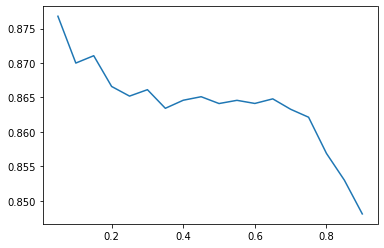

In [ ]:
myAccuracy = [[]]
myMatrix = []
myReport = []
testSizes = []

    
for x in range (5, 95, 5):
    testSizes.append(x/100)

for i in range(len(testSizes)):
    myAccuracy.append([])
    for x in range(0, 10):
        trainingData, testingData = train_test_split(movieReviewsdf, test_size = testSizes[i], random_state = 42)

        xTraining, yTraining = trainingData['review'], trainingData['sentiment']
        xTest, yTest = testingData['review'], testingData['sentiment']

        tfidfVector = TfidfVectorizer()
        xTrainingVector = tfidfVector.fit_transform(xTraining)
  
        xTestVector = tfidfVector.transform(xTest)

        multiNB = MultinomialNB()
        multiNB.fit(xTrainingVector, yTraining.values)

        predictNB = multiNB.predict(xTestVector)

        myAccuracy[i].append(accuracy_score(yTest, predictNB))
    
averageAccuracy = []
for i in range(len(testSizes)):
    averageAccuracy.append(sum(myAccuracy[i]) / len(myAccuracy[i]))
        

Plot the graph to show the accuracy against the test size and the training size for a naive bayes model. 

Text(0, 0.5, 'Accuracy')

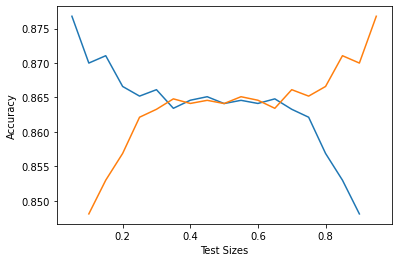

In [ ]:
plt.plot(testSizes, averageAccuracy, label = "testing size")
trainingSizes = []
for x in range(0, len(testSizes)):
  trainingSizes.append(1-testSizes[x])

plt.plot(trainingSizes, averageAccuracy, label = "training size" )
plt.xlabel("Test Sizes")
plt.ylabel("Accuracy")

Tuning the Naive Bayes model, starting with an alpha parameter of 0.00001 increasing by a factor of 10 until 1000 is reached.

In [ ]:
averageAccuracy = []

alphaParams=[0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]

for i in range(0, len(alphaParams) ,1):
  accuracyNB = []
  for j in range(0, 3, 1):
 
    trainingData, testingData = train_test_split(movieReviewsdf, test_size = 0.2, random_state = 42)

    xTraining, yTraining = trainingData['review'], trainingData['sentiment']
    xTest, yTest = testingData['review'], testingData['sentiment']

    tfidfVector = TfidfVectorizer()
    xTrainingVector = tfidfVector.fit_transform(xTraining)
  
    xTestVector = tfidfVector.transform(xTest)

    multiNB = MultinomialNB(alpha = alphaParams[i])
    multiNB.fit(xTrainingVector, yTraining.values)

    predictNB = multiNB.predict(xTestVector)

    accuracyNB.append(accuracy_score(yTest, predictNB))
  
  averageAccuracy.append(sum(accuracyNB)/3)

for i in range(0, len(alphaParams), 1):
  print("Alpha value: ", alphaParams[i], "Accuracy value: ", averageAccuracy[i])



Alpha value:  1e-05 Accuracy value:  0.8176
Alpha value:  0.0001 Accuracy value:  0.8274
Alpha value:  0.001 Accuracy value:  0.8395
Alpha value:  0.1 Accuracy value:  0.8614
Alpha value:  1 Accuracy value:  0.8666
Alpha value:  10 Accuracy value:  0.8630999999999999
Alpha value:  100 Accuracy value:  0.8281
Alpha value:  1000 Accuracy value:  0.7707


Plot the accuracies of the model against the alpha value.

['1e-05', '0.0001', '0.001', '0.1', '1', '10', '100', '1000']


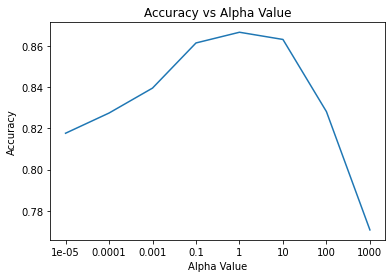

In [ ]:
A = [str(x) for x in alphaParams]
print(A)
plt.plot(A, averageAccuracy)
plt.title('Accuracy vs Alpha Value')
plt.xlabel('Alpha Value')
plt.ylabel('Accuracy')
plt.show()

Find the best alpha value between 1-10. The graph above shows the best alpha value is between 1-10. Produce each model 3 times and average to find the best alpha value.


In [ ]:
averageAccuracy = []

for i in range(1, 11 ,1):
  accuracyNB = []
  for j in range(0, 3, 1):
 
    trainingData, testingData = train_test_split(movieReviewsdf, test_size = 0.2, random_state = 42)

    xTraining, yTraining = trainingData['review'], trainingData['sentiment']
    xTest, yTest = testingData['review'], testingData['sentiment']

    tfidfVector = TfidfVectorizer()
    xTrainingVector = tfidfVector.fit_transform(xTraining)
  
    xTestVector = tfidfVector.transform(xTest)

    multiNB = MultinomialNB(alpha = i)
    multiNB.fit(xTrainingVector, yTraining.values)

    predictNB = multiNB.predict(xTestVector)

    accuracyNB.append(accuracy_score(yTest, predictNB))
  
  averageAccuracy.append(sum(accuracyNB)/3)

for i in range(0, 10, 1):
  print("Alpha value: ", i, "Accuracy value: ", averageAccuracy[i])

Alpha value:  0 Accuracy value:  0.8666
Alpha value:  1 Accuracy value:  0.8668
Alpha value:  2 Accuracy value:  0.8672
Alpha value:  3 Accuracy value:  0.8664999999999999
Alpha value:  4 Accuracy value:  0.8652000000000001
Alpha value:  5 Accuracy value:  0.8639
Alpha value:  6 Accuracy value:  0.8633000000000001
Alpha value:  7 Accuracy value:  0.8633000000000001
Alpha value:  8 Accuracy value:  0.8637
Alpha value:  9 Accuracy value:  0.8630999999999999


Plot the alpha values against the accuracy for the Naive Bayes model.

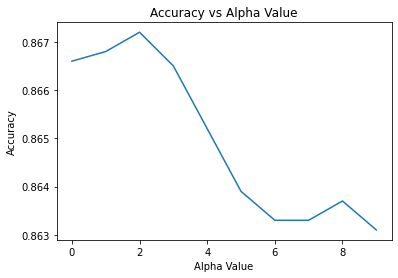

In [ ]:
alphaValues = []
for x in range(0, 10, 1):
  alphaValues.append(x) 

plt.plot(alphaValues, averageAccuracy)
plt.title('Accuracy vs Alpha Value')
plt.xlabel('Alpha Value')
plt.ylabel('Accuracy')
plt.show()

This is a more indepth alpha value search, utilising nearly 200 alpha values.

In [ ]:
i = 0.05;
accuracyNB2 = []
while i < 10:
  trainingData, testingData = train_test_split(movieReviewsdf, test_size = 0.2, random_state = 42)

  xTraining, yTraining = trainingData['review'], trainingData['sentiment']
  xTest, yTest = testingData['review'], testingData['sentiment']

  tfidfVector = TfidfVectorizer()
  xTrainingVector = tfidfVector.fit_transform(xTraining)
  
  xTestVector = tfidfVector.transform(xTest)

  multiNB = MultinomialNB(alpha = i)
  multiNB.fit(xTrainingVector, yTraining.values)

  predictNB = multiNB.predict(xTestVector)

  accuracyNB2.append(accuracy_score(yTest, predictNB))
  print("Alpha: ", i, "  Accuracy: ", accuracy_score(yTest, predictNB))
  i+=0.05

Alpha:  0.05   Accuracy:  0.8594
Alpha:  0.1   Accuracy:  0.8614
Alpha:  0.15000000000000002   Accuracy:  0.8636
Alpha:  0.2   Accuracy:  0.8641
Alpha:  0.25   Accuracy:  0.8649
Alpha:  0.3   Accuracy:  0.8654
Alpha:  0.35   Accuracy:  0.8657
Alpha:  0.39999999999999997   Accuracy:  0.8652
Alpha:  0.44999999999999996   Accuracy:  0.8656
Alpha:  0.49999999999999994   Accuracy:  0.8653
Alpha:  0.5499999999999999   Accuracy:  0.8652
Alpha:  0.6   Accuracy:  0.8654
Alpha:  0.65   Accuracy:  0.8657
Alpha:  0.7000000000000001   Accuracy:  0.8659
Alpha:  0.7500000000000001   Accuracy:  0.8663
Alpha:  0.8000000000000002   Accuracy:  0.8668
Alpha:  0.8500000000000002   Accuracy:  0.8665
Alpha:  0.9000000000000002   Accuracy:  0.8664
Alpha:  0.9500000000000003   Accuracy:  0.8669
Alpha:  1.0000000000000002   Accuracy:  0.8666
Alpha:  1.0500000000000003   Accuracy:  0.8666
Alpha:  1.1000000000000003   Accuracy:  0.8663
Alpha:  1.1500000000000004   Accuracy:  0.8661
Alpha:  1.2000000000000004   Ac

In [ ]:
i = 0.05
alphaValues = []
while i < 10:
  alphaValues.append(i)
  i += 0.05;
  

Plot all 199 alpha values against their accuracies.

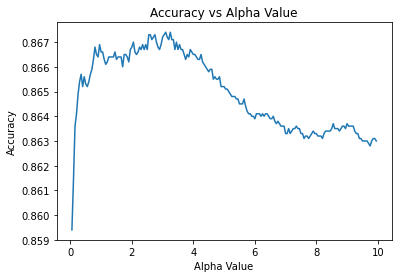

In [ ]:
plt.plot(alphaValues, accuracyNB2)
plt.title('Accuracy vs Alpha Value')
plt.xlabel('Alpha Value')
plt.ylabel('Accuracy')
plt.show()

Create a Naive Bayes model with the best alpha value found = 2.

In [144]:
trainingData, testingData = train_test_split(movieReviewsdf, test_size = 0.2, random_state = 42)

xTraining, yTraining = trainingData['review'], trainingData['sentiment']
xTest, yTest = testingData['review'], testingData['sentiment']

tfidfVector = TfidfVectorizer()
xTrainingVector = tfidfVector.fit_transform(xTraining)
  
xTestVector = tfidfVector.transform(xTest)

multiNB = MultinomialNB(alpha = 2)
multiNB.fit(xTrainingVector, yTraining.values)


predictNB = multiNB.predict(xTestVector)
accuracyScoreMNB1 = accuracy_score(yTest, predictNB)
print("Classification Report: \n", classification_report(yTest, predictNB))
print("Confusion Matrix: \n", confusion_matrix(yTest, predictNB))
print("Accuracy: \n", accuracyScoreMNB1)

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      4961
           1       0.88      0.85      0.86      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

Confusion Matrix: 
 [[4401  560]
 [ 772 4267]]
Accuracy: 
 0.8668


Create the linear Support Vector Machine model from the sklearn library.

In [ ]:
from sklearn.svm import LinearSVC
trainingData, testingData = train_test_split(movieReviewsdf, test_size = 0.2, random_state = 42)

xTraining, yTraining = trainingData['review'], trainingData['sentiment']
xTest, yTest = testingData['review'], testingData['sentiment']

tfidfVector = TfidfVectorizer()
xTrainingVector = tfidfVector.fit_transform(xTraining)
  
xTestVector = tfidfVector.transform(xTest)

linearSVC = LinearSVC()
linearSVC.fit(xTrainingVector, yTraining.values)

predictSVC = linearSVC.predict(xTestVector)


Ouput the reports, confusion matrix and accuracy score for the Support Vector Machine model.

In [ ]:
print("Classification Report: \n", classification_report(yTest, predictSVC))
print("Confusion Matrix: \n", confusion_matrix(yTest, predictSVC))
print("Accuracy: \n", accuracy_score(yTest, predictSVC))

Find the best test train split between 0.2-0.3 for test data.

Stop


Text(0.5, 0, 'Test Sizes')

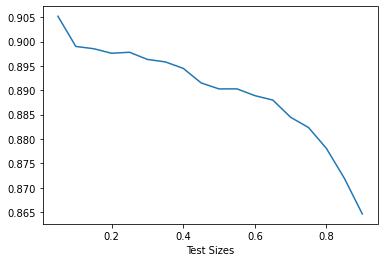

In [ ]:
myAccuracy = [[]]
myMatrix = []
myReport = []
testSizes = []

    
for x in range (5, 95, 5):
    testSizes.append(x/100)

for i in range(len(testSizes)):
    myAccuracy.append([])
    for x in range(0, 10):
        trainingData, testingData = train_test_split(movieReviewsdf, test_size = testSizes[i], random_state = 42)

        xTraining, yTraining = trainingData['review'], trainingData['sentiment']
        xTest, yTest = testingData['review'], testingData['sentiment']

        tfidfVector = TfidfVectorizer()
        xTrainingVector = tfidfVector.fit_transform(xTraining)
  
        xTestVector = tfidfVector.transform(xTest)

        linearSVC = LinearSVC()
        linearSVC.fit(xTrainingVector, yTraining.values)

        predictSVC = linearSVC.predict(xTestVector)

        myAccuracy[i].append(accuracy_score(yTest, predictSVC))
    
averageAccuracy = []
for i in range(len(testSizes)):
    averageAccuracy.append(sum(myAccuracy[i]) / len(myAccuracy[i]))
        

Plot the graph showing the test sizes vs the accuracy of the model.

In [ ]:
plt.plot(testSizes, averageAccuracy)
plt.xlabel("Test Sizes")
plt.ylabel("Accuracy")

Tune the model, to find the best C value. Utilsing the 0.3 split as that showed the best accuracy. Increment the C value from 0.05 to 0.95, increment by 0.05. Each accuracy of each model produced to be stored within an array.

In [ ]:
    linearSVC2 = LinearSVC()
    SVCAccuracy = []
    CValues =[]
    i = 0.05;
    trainingData, testingData = train_test_split(movieReviewsdf, test_size = 0.3, random_state = 42)

    xTraining, yTraining = trainingData['review'], trainingData['sentiment']
    xTest, yTest = testingData['review'], testingData['sentiment']

    tfidfVector = TfidfVectorizer()
    xTrainingVector = tfidfVector.fit_transform(xTraining)
  
    xTestVector = tfidfVector.transform(xTest)

    while i <= 1:
       
      linearSVC2 = LinearSVC(C=i)
      linearSVC2.fit(xTrainingVector, yTraining.values)

      predictSVC2 = linearSVC2.predict(xTestVector)
      
      SVCAccuracy.append(accuracy_score(yTest, predictSVC2))
      CValues.append(i)
      i+=0.05


Plot a graph which shows the C value against the accuracy of the model.

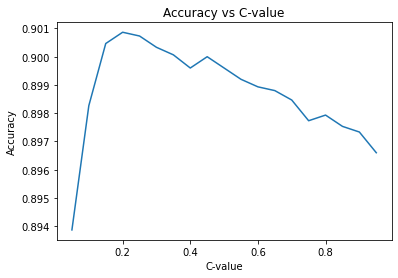

In [ ]:

plt.plot(CValues, SVCAccuracy)
plt.title('Accuracy vs C-value')
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

Find the C-value with the best accuracy. Output it to screen.

In [ ]:
print(max(SVCAccuracy))
indexMax = np.argmax(SVCAccuracy)
print(indexMax)

print("Best C-value = ", float(CValues[indexMax]))

bestCValue = float(CValues[indexMax])

0.9008666666666667
3
Best C-value =  0.2


More in-depth investigation into the C-value. Starting at 0.1 increase until 0.4 by 0.01. This will allow us to find the best possible C-value for the model. For each C-value construct 3 models and store the average.

In [ ]:
    linearSVC2 = LinearSVC()
    averageSVCAccuracy = []
    CValues =[]
    i = 0.10;
    while i <= 0.4:  
      SVCAccuracy = []    
      for j in range(0, 3, 1):
        trainingData, testingData = train_test_split(movieReviewsdf, test_size = 0.3, random_state = 42)

        xTraining, yTraining = trainingData['review'], trainingData['sentiment']
        xTest, yTest = testingData['review'], testingData['sentiment']

        tfidfVector = TfidfVectorizer()
        xTrainingVector = tfidfVector.fit_transform(xTraining)
  
        xTestVector = tfidfVector.transform(xTest)
        linearSVC2 = LinearSVC(C=i)
        linearSVC2.fit(xTrainingVector, yTraining.values)

        predictSVC2 = linearSVC2.predict(xTestVector)
      
        SVCAccuracy.append(accuracy_score(yTest, predictSVC2))
      
      averageSVCAccuracy.append(sum(SVCAccuracy)/len(SVCAccuracy))
      CValues.append(i)
      i+=0.01

Plot the average accuracy against its CValue.

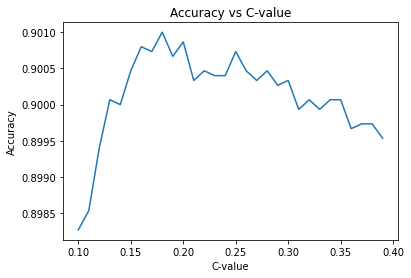

In [ ]:
plt.plot(CValues, SVCAccuracy)
plt.title('Accuracy vs C-value')
plt.xlabel('C-value')
plt.ylabel('Accuracy')
plt.show()

Find the best C-Value by looking for the max accuracy.

In [ ]:
print(max(SVCAccuracy))
indexMax = np.argmax(SVCAccuracy)
print(indexMax)

print("Best C-value = ", float(CValues[indexMax]))

bestCValue = float(CValues[indexMax])

0.901
8
Best C-value =  0.18000000000000005


Best C-value is 0.18. Create model with this C-value and output all of its Stats. This includes accuracy, classification report and confustion matrix.

In [ ]:

trainingData, testingData = train_test_split(movieReviewsdf, test_size = 0.3, random_state = 42)

xTraining, yTraining = trainingData['review'], trainingData['sentiment']
xTest, yTest = testingData['review'], testingData['sentiment']

tfidfVector = TfidfVectorizer()
xTrainingVector = tfidfVector.fit_transform(xTraining)

xTestVector = tfidfVector.transform(xTest)

linearSVC = LinearSVC(C=bestCValue)
linearSVC.fit(xTrainingVector, yTraining.values)

predictSVC = linearSVC.predict(xTestVector)

accuracyScoreSVC = accuracy_score(yTest, predictSVC)

print("Classification Report: \n", classification_report(yTest, predictSVC))
print("Confusion Matrix: \n", confusion_matrix(yTest, predictSVC))
print("Accuracy: \n", accuracyScoreSVC)

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      7411
           1       0.89      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000

Confusion Matrix: 
 [[6586  825]
 [ 660 6929]]
Accuracy: 
 0.901


Create the ablation dataframe. Each new columns has a new pre-processing technique added to the last.


In [51]:
abolitionStudydf = pd.read_csv('/content/IMDB Dataset.csv')  
    
abolitionStudydf['sentiment'] = abolitionStudydf['sentiment'].apply(relabelSentiment)

abolitionStudydf['noHTML'] = abolitionStudydf['review'].apply(removeHTML)

abolitionStudydf['noLinks'] = abolitionStudydf['noHTML'].apply(removeLinks)

abolitionStudydf['lowerCase'] = abolitionStudydf['noLinks'].apply(toLowerCase)

abolitionStudydf['noPunctuation'] = abolitionStudydf['lowerCase'].apply(removePunctuation)

abolitionStudydf['noDoubleSpaces'] = abolitionStudydf['noPunctuation'].apply(removeDoubleSpace)

abolitionStudydf['lemmatizeReviewWordNet'] = abolitionStudydf['noDoubleSpaces'].apply(lemmatizeReviewWordNet)

abolitionStudydf['removeStopWords'] = abolitionStudydf['lemmatizeReviewWordNet'].apply(removeStopWords)
 

Output all the columns in the dataFrame.

In [54]:
for i in range(0, len(abolitionStudydf.columns)):
  print(abolitionStudydf.columns[i])


review
sentiment
noHTML
noLinks
lowerCase
noPunctuation
noDoubleSpaces
lemmatizeReviewWordNet
removeStopWords


Go through each column in the ablation database, create a model from that data, data the model and store it. This will show the pre-processing effects on the accuracy of the Naive Bayes model. Utilsing the count vectorizer.

In [133]:
abolitionStudyMNBAccuracy = []

Columns = ["review", "noHTML", "noLinks", "lowerCase", "noPunctuation", "noDoubleSpaces", "lemmatizeReviewWordNet",]

for i in range(0, len(Columns), 1):
  trainingData, testingData = train_test_split(abolitionStudydf, test_size = 0.3, random_state = 42)

  columnName = Columns[i]

  xTraining, yTraining = trainingData[columnName], trainingData['sentiment']
  xTest, yTest = testingData[columnName], testingData['sentiment']

  tfidfVector = CountVectorizer()
  xTrainingVector = tfidfVector.fit_transform(xTraining)
  xTestVector = tfidfVector.transform(xTest)
  multiNB = MultinomialNB()
  multiNB.fit(xTrainingVector, yTraining.values)
  predictNB = multiNB.predict(xTestVector)
  accuracyScoreMNB = accuracy_score(yTest, predictNB)

  abolitionStudyMNBAccuracy.append(accuracyScoreMNB)


Go through each column in the ablation database, create a model from that data, data the model and store it. This will show the pre-processing effects on the accuracy of the SVM model. Utilsing the count vectorizer.


In [134]:
abolitionStudySVCAccuracy = []

Columns = ["review", "noHTML", "noLinks", "lowerCase", "noPunctuation", "noDoubleSpaces", "lemmatizeReviewWordNet",]
for i in range(0, len(Columns), 1):
  trainingData, testingData = train_test_split(abolitionStudydf, test_size = 0.3, random_state = 42)

  columnName = Columns[i]

  xTraining, yTraining = trainingData[columnName], trainingData['sentiment']
  xTest, yTest = testingData[columnName], testingData['sentiment']

  tfidfVector = CountVectorizer()
  xTrainingVector = tfidfVector.fit_transform(xTraining)
  xTestVector = tfidfVector.transform(xTest)
    
  linearSVC = LinearSVC(C=0.18)
  linearSVC.fit(xTrainingVector, yTraining.values)

  predictSVC = linearSVC.predict(xTestVector)

  abolitionStudySVCAccuracy.append(accuracy_score(yTest, predictSVC))


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

Output the Naive Bayes accuracies in regards to each pre-processing technique.

TypeError: ignored

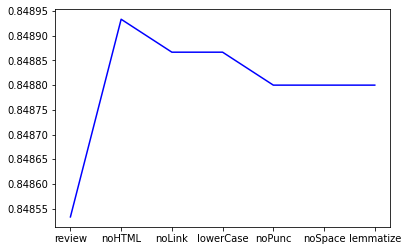

In [123]:
Columns = ["review", "noHTML", "noLink", "lowerCase", "noPunc", "noSpace", "lemmatize"]
plt.plot(Columns, abolitionStudyMNBAccuracy, color="blue")

plt.xlabel("Processing Technique")
plt.ylabel("Accuracy")

Output the SVM accuracies in regards to the pre-processing techniques.

TypeError: ignored

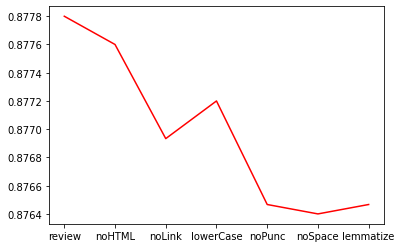

In [124]:
Columns = ["review", "noHTML", "noLink", "lowerCase", "noPunc", "noSpace", "lemmatize",]

plt.plot(Columns, abolitionStudySVCAccuracy, color="red")
plt.xlabel("Processing Technique")
plt.ylabel("Accuracy")


Add the accuracy when a TfidfVectorizer is used instead of a Count Vectorizer for a Naive Bayes model.

In [135]:
Columns = ["review", "noHTML", "noLinks", "lowerCase", "noPunctuation", "noDoubleSpaces", "lemmatizeReviewWordNet",]
trainingData, testingData = train_test_split(abolitionStudydf, test_size = 0.3, random_state = 42)

columnName = Columns[i]

xTraining, yTraining = trainingData[columnName], trainingData['sentiment']
xTest, yTest = testingData[columnName], testingData['sentiment']

tfidfVector = TfidfVectorizer()
xTrainingVector = tfidfVector.fit_transform(xTraining)
xTestVector = tfidfVector.transform(xTest)
    
linearSVC = LinearSVC(C=0.18)
linearSVC.fit(xTrainingVector, yTraining.values)

predictSVC = linearSVC.predict(xTestVector)

abolitionStudySVCAccuracy.append(accuracy_score(yTest, predictSVC))


Add the accuracy when a TfidfVectorizer is used instead of a Count Vectorizer for a SVM model.

In [136]:
rainingData, testingData = train_test_split(abolitionStudydf, test_size = 0.3, random_state = 42)

xTraining, yTraining = trainingData[columnName], trainingData['sentiment']
xTest, yTest = testingData[columnName], testingData['sentiment']

tfidfVector = TfidfVectorizer()
xTrainingVector = tfidfVector.fit_transform(xTraining)
xTestVector = tfidfVector.transform(xTest)
multiNB = MultinomialNB()
multiNB.fit(xTrainingVector, yTraining.values)
predictNB = multiNB.predict(xTestVector)
accuracyScoreMNB = accuracy_score(yTest, predictNB)

abolitionStudyMNBAccuracy.append(accuracyScoreMNB)


Construct a graph showing the effect utilsing a TfidfVectorizer has in regards to the accuracy of a SVM algorithm.

TypeError: ignored

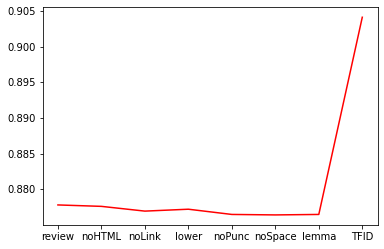

In [129]:

Columns = ["review", "noHTML", "noLink", "lower", "noPunc", "noSpace", "lemma", "TFID"]

plt.plot(Columns, abolitionStudySVCAccuracy, color="red")
plt.xlabel("Processing Technique")
plt.ylabel("Accuracy")

Construct a graph showing the effect utilsing a TfidfVectorizer has in regards to the accuracy of a Naive Bayes algorithm.

TypeError: ignored

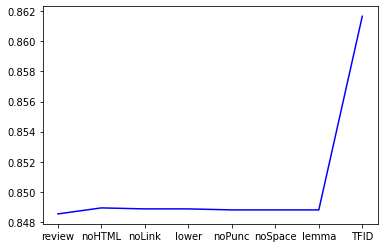

In [109]:
plt.plot(Columns, abolitionStudyMNBAccuracy, color="blue")

plt.xlabel("Processing Technique")
plt.ylabel('Accuracy')

Print all of the accuracies of both models.

In [132]:
print(abolitionStudyMNBAccuracy)
print(abolitionStudySVCAccuracy)

[0.8485333333333334, 0.8489333333333333, 0.8488666666666667, 0.8488666666666667, 0.8488, 0.8488, 0.8488, 0.8616666666666667]
[0.8778, 0.8776, 0.8769333333333333, 0.8772, 0.8764666666666666, 0.8764, 0.8764666666666666, 0.9041333333333333]


Create the best SVM model, this will be used to predict my self-made reviews.

In [21]:
trainingData, testingData = train_test_split(movieReviewsdf, test_size = 0.3, random_state = 42)

xTraining, yTraining = trainingData['review'], trainingData['sentiment']
xTest, yTest = testingData['review'], testingData['sentiment']

tfidfVector = TfidfVectorizer()
xTrainingVector = tfidfVector.fit_transform(xTraining)

xTestVector = tfidfVector.transform(xTest)

linearSVC = LinearSVC(C=0.18)
linearSVC.fit(xTrainingVector, yTraining.values)

predictSVC = linearSVC.predict(xTestVector)

accuracyScoreSVC = accuracy_score(yTest, predictSVC)

print("Classification Report: \n", classification_report(yTest, predictSVC))
print("Confusion Matrix: \n", confusion_matrix(yTest, predictSVC))
print("Accuracy: \n", accuracyScoreSVC)

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      7411
           1       0.89      0.91      0.90      7589

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000

Confusion Matrix: 
 [[6586  825]
 [ 660 6929]]
Accuracy: 
 0.901


Create my reviews. Review 1 is positive. 2 is Negative. 3 is positive. 4 is negative. 5 is neatral.

In [7]:
Reviews = ["Loves this movie the characters within it were great actors. The cinematography was great, and the plot line was amazing!",

"I hated this movie what a waste of time. I want my money back from having to watch this terrible movie.",

"The movie was good overall. But some of the actors were not very good. I did enjoy the ending.",

"The sound affects were very good but the movie was terrible. The actors didn’t even get their lines right. I hated it.",

"The actors were good the plot was bad. Overall, a neutral experience."]

Gain the predictions of the SVM model regarding my reviews and output them.

In [30]:
xTest = tfidfVector.transform(Reviews)

predictions = linearSVC.predict(xTest)

print(predictions)

[1 0 1 0 0]
